# Least squares problems

We sometimes wish to solve problems of the form

$$
\boldsymbol{A} \boldsymbol{x} = \boldsymbol{b}
$$

where $\boldsymbol{A}$ is a $m \times n$ matrix. If $m > n$, in general no solution to the problem exists. This is a typical of an over-determined problem - we have more equations than unknowns. A classical example is when trying to fit an $k$th-order polynomial to $p > k + 1$ data points - the degree of the polynomial is not high enough to construct an interpolating polynomial.

In this notebook we assume that $\boldsymbol{A}$ is full rank, i.e. the columns of $\boldsymbol{A}$ are linearly independent. We will look at the case when $\boldsymbol{A}$ is not full rank later.

Before computing least-squares problems, we start with examples of polynomial interpolation.

Note: This notebook uses [interactive widgets](https://ipywidgets.readthedocs.io/) to interactively explore various effects. The widget sliders will be be visiable through nbviewer.

## Polynomial interpolation

Polynomial interpolation involves fitting a $n$th-order polynomial to values at $n + 1$ data points.

### Interpolating the Runge function

We will investigate interpolating the Runge function 
$$
y = \frac{1}{1 + 25 x^{2}}
$$
on the interval $[-1, 1]$:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Use seaborn to style the plots and use accessible colors
# import seaborn as sns
# sns.set()
# sns.set_palette("colorblind")

import numpy as np

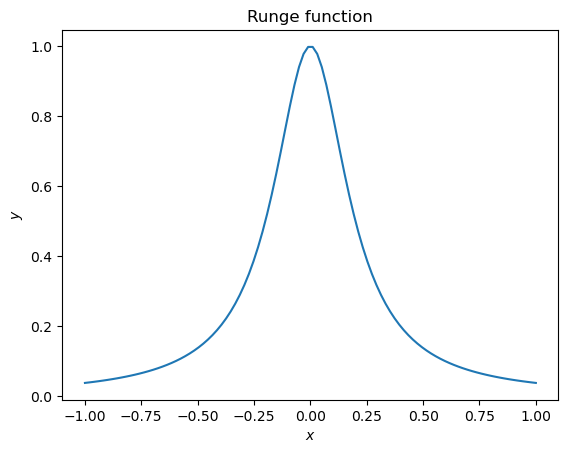

In [7]:
N = 100
x = np.linspace(-1, 1, N)
def runge(x):
    return 1 /(25 * (x**2) + 1)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Runge function')
plt.plot(x, runge(x),'-');

Next, we will sample the Runge function at points and fit a polynomial to these evaluation points. If we sample the function at $n$ points we can fit a polynomial of degree $n - 1$:
$$
f = c_{n-1} x^{n-1} + c_{n-2} x^{n-2} + \ldots  + c_{1} x + c_{0}.
$$

We can find the polynomial coefficients $c_{i}$ by solving  $\boldsymbol{A} \boldsymbol{c} = \boldsymbol{y}_p$, where $\boldsymbol{A}$ is the *Vandermonde matrix*:
$$ 
\boldsymbol{A} = \begin{bmatrix}
     x_{1}^{n-1} & x_{1}^{n-2} & \ldots & x_{1}^{2}  & x_{1} & 1  
    \\
     x_{2}^{n-1} & x_{2}^{n-2} & \ldots & x_{2}^{2}  & x_{2} & 1  
    \\
    \vdots  & \vdots & \vdots    & \ldots & \vdots   
    \\
     x_{n}^{n-1} & x_{n}^{n-2} & \ldots & x_{n}^{2}  & x_{n} & 1  
\end{bmatrix}
$$
and the vector $\boldsymbol{c}$ contains the unknown polynomial coefficients
$$ 
\boldsymbol{c} = \begin{bmatrix}
    c_{19} & c_{20} & \ldots & c_{0}  
\end{bmatrix}^{T}
$$

and the vector $\boldsymbol{y}_p$ contains the points $y(x_{i})$ that we wish to fit.

*Note: the ordering in each row of the Vandermonde matrix above is reversed with respect to what you will find in most books. We do this because the default NumPy function for generating the Vandermonde matrix uses the above ordering.*

Using the NumPy built-in function to generate the Vandermonde matrix for $n_p$ points (polynomial degree $n_{p} -1)$:

In [8]:
n_p = 5
x_p = np.linspace(-1, 1, n_p)
A = np.vander(x_p, n_p)
print(x_p)
print(A)

[-1.  -0.5  0.   0.5  1. ]
[[ 1.     -1.      1.     -1.      1.    ]
 [ 0.0625 -0.125   0.25   -0.5     1.    ]
 [ 0.      0.      0.      0.      1.    ]
 [ 0.0625  0.125   0.25    0.5     1.    ]
 [ 1.      1.      1.      1.      1.    ]]


Solving for the coefficients:

In [9]:
y_p = runge(x_p)
c = np.linalg.solve(A, y_p)

NumPy has a function `poly1d` to turn the coefficients into a polynomial object, and it can display a representation of the polynomial:

In [11]:
p = np.poly1d(c)
print(p)

       4         2
3.316 x - 4.277 x - 0 x + 1


To plot the fitted polynomial, we evaluate it at at 200 points:

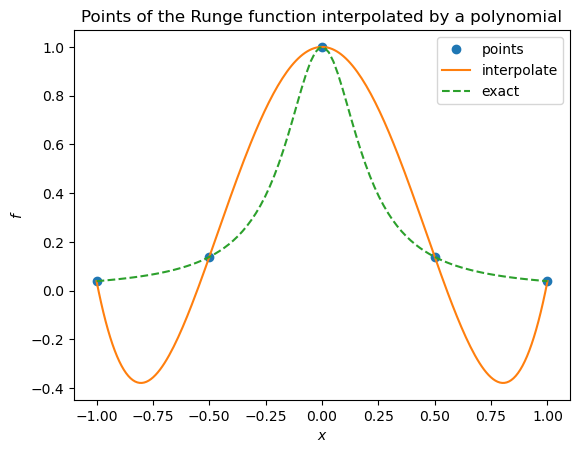

In [12]:
# Create an array of 200 equally spaced points on [-1, 1]
x_fit = np.linspace(-1, 1, 200) 

# Evaluate the polynomial at the points
y_fit = p(x_fit)

# Plot the interpolating polynomial and the sample points
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title('Points of the Runge function interpolated by a polynomial')
plot = plt.plot(x_p, y_p, 'o', label='points')
plot = plt.plot(x_fit, y_fit,'-', label='interpolate')
plot = plt.plot(x, runge(x), '--', label='exact')
plt.legend();

Note how the polynomial fitting function oscillates near the ends of the interval. We might think that a richer, higher-order degree polynomial would provide a better fit:

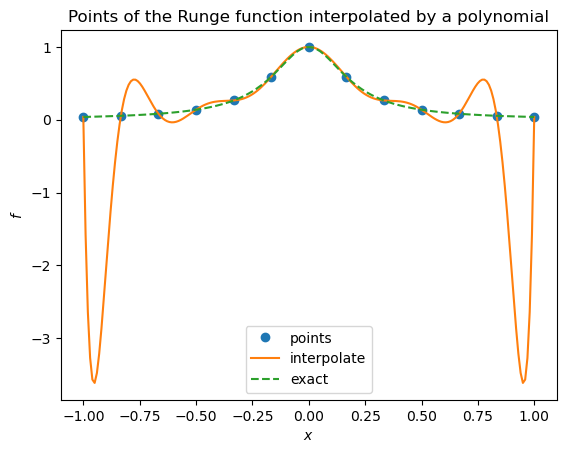

In [13]:
n_p = 13
x_p = np.linspace(-1, 1, n_p)
A = np.vander(x_p, n_p)
y_p = runge(x_p)
c = np.linalg.solve(A, y_p)
p = np.poly1d(c)
y_fit = p(x_fit)

# Plot the interpolating polynomial and the sample points
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title('Points of the Runge function interpolated by a polynomial')
plot = plt.plot(x_p, y_p, 'o', label='points')
plot = plt.plot(x_fit, y_fit,'-', label='interpolate')
plot = plt.plot(x, runge(x), '--', label='exact')
plt.legend();

However, we see that the oscillations near the ends of the internal become worse with a higher degree polynomial.

By wrapping this problem in a function we can make it interactive:

In [ ]:
from ipywidgets import widgets
from ipywidgets import interact

@interact(order=(0, 19))
def plot(order):
    x_p = np.linspace(-1, 1, order + 1)
    A = np.vander(x_p, order + 1)
    y_p = runge(x_p)
    c = np.linalg.solve(A, y_p)
    p = np.poly1d(c)
    y_fit = p(x_fit)

    # Plot the interpolating polynomial and the sample points
    plt.xlabel('$x$')
    plt.ylabel('$f$')
    plt.title('Points of the Runge function interpolated by a polynomial')
    plot = plt.plot(x_p, y_p, 'o', label='points')
    plot = plt.plot(x_fit, y_fit,'-', label='interpolate ' + str(order) )
    plot = plt.plot(x, runge(x), '--', label='exact')
    plt.legend()

There two issue to consider here. The first is that the polynmial clearly fluctuates near the ends of the interval. This is know as the *Runge effect*. A second issue that is less immediately obvious is that the Vandermonde matrix is very poorly conditioned.

## Conditioning of the Vandermonde matrix 

We compute the Vandermone matrix for increasing polynimial degree, and see below that the condition number of the Vandermonde matrix can become extremely large for high polynomial degrees.

In [9]:
n_p = 13
x_p = np.linspace(-1, 1, n_p)
A = np.vander(x_p, n_p)
print(f"Condition number of the Vandermonde matrix: {np.linalg.cond(A, 2):e}")

n_p = 20
x_p = np.linspace(-1, 1, n_p)
A = np.vander(x_p, n_p)
print(f"Condition number of the Vandermonde matrix: {np.linalg.cond(A, 2):e}")

n_p = 30
x_p = np.linspace(-1, 1, n_p)
A = np.vander(x_p, n_p)
print(f"Condition number of the Vandermonde matrix: {np.linalg.cond(A, 2):e}")

n_p = 30
x_p = np.linspace(-10, 10, n_p)
A = np.vander(x_p, n_p)
print(f"Condition number of the Vandermonde matrix: {np.linalg.cond(A, 2):e}")

Condition number of the Vandermonde matrix: 1.233897e+05
Condition number of the Vandermonde matrix: 2.722408e+08
Condition number of the Vandermonde matrix: 1.838538e+13
Condition number of the Vandermonde matrix: 9.884708e+29


## Orthogonal polynomials

In the preceding, we worked with a monomial basis:
$$
1, \ x, \ x^{2},  \ldots , \ x^{n-1}
$$
and considered polynomials of the form
$$
f = c_{n-1} x^{n-1} + c_{n-2} x^{n-2} + \ldots  + c_{1} x + c_{0}.
$$
where we would pick (or solver for in the case of interpolation) the coefficients $\{c_{i}\}$.

There are, however, alternatives to the monomial basis with remarkably rich and fascinating properties. We will consider Legendre polynomials on the internal $[-1, 1]$. There are various expressions for computing Legendre polynomials. One expressions for computing the Legendre polynomial of degree $n$, $P_{n}$, is:
$$
(n+1) P_{n+1}(x) = (2n+1) x P_{n}(x) - n P_{n-1}(x)
$$
where $P_{0} = 1$ and $P_{0} = x$. The special feature of Legendre polynomial is that:
$$
\int_{-1}^{1} P_{m}(x) P_{n}(x) \, dx = 0 \quad {\rm if} \ m \ne n,
$$
i.e. Legendre polynomials of different degree are orthogonal to each other.

Plotting the Legendre polynomials up to $P_{9}$:

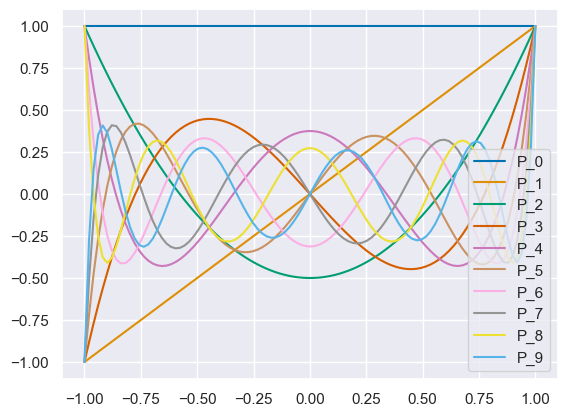

In [10]:
for order in range(10):
   x, y = np.polynomial.legendre.Legendre.basis(order, [-1, 1]).linspace(100)
   plt.plot(x, y, label="P_{}".format(order))
plt.grid(True)
plt.legend();
plt.savefig("legendre.pdf")

Comparing to the mononomal basis:

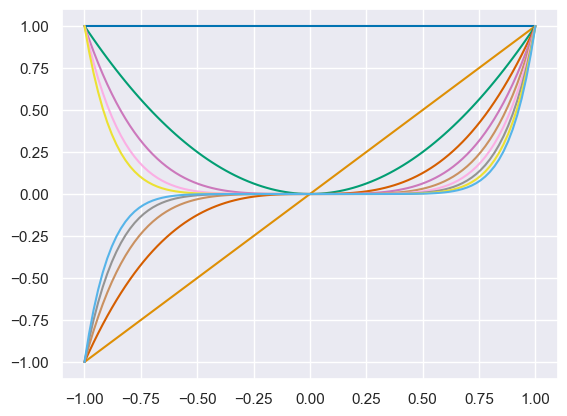

In [11]:
x_p = np.linspace(-1, 1, 100)
for order in range(10):
   y_p = x_p**order
   plt.plot(x_p, y_p, label="m_{}".format(order))
plt.savefig("mononomial.pdf")

we see that the Legendre polynomial and the mononomials appear very different, depsite both spanning (being a basis) for the same space. Note how the higher order mononomial terms are indistinguishable near zero, whereas the Legendre polynomials are clearly distinct from each other.

Legendre polynomials of degree up to and including $n$ span the same space as $1, x, x^{2},\ldots, x^{n}$, so we can express any polynomial of degree $n$ as
$$
f = \alpha_{n} P_{n}(x) + \alpha_{n-1} P_{n-1}(x) + \ldots + \alpha_{0} P_{0}(x)
$$
To find the $\{ \alpha_{n} \}$ coefficients can construct a generalised Vandermonde matrix $\boldsymbol{A}$ and solve  $\boldsymbol{A} \boldsymbol{\alpha} = \boldsymbol{y}_p$, where
$$ 
\boldsymbol{A} = \begin{bmatrix}
    P_{n}(x_{0}) & P_{n-1}(x_{0}) & \ldots & P_2(x_{0})  & P_1(x_{0}) & P_0(x_{0})  
    \\
    P_{n}(x_{1}) & P_{n-1}(x_{1}) & \ldots & P_2(x_{1})  & P_1(x_{1}) & P_0(x_{1})  
    \\
    \vdots  & \vdots & \vdots    & \ldots & \vdots   
    \\
     P_{n}(x_{n}) & P_{n-1}(x_{n}) & \ldots & P_2(x_{n})  & P_1(x_{n}) & P_0(x_{n})  
\end{bmatrix}
$$

If we use the Legendre Vandermonde matrix to compute the coeffecients, in exact arithmetic we would compute the same polynomial as with the mononomial basis. However, comparing the condition number for the Vandermonde matrices:

In [12]:
N = 20
x_p = np.linspace(-1, 1, N)

A = np.vander(x_p, N)
print(f"Condition number of the Vandermonde matrix (mononomial): {np.linalg.cond(A, 2):e}")

A = np.polynomial.legendre.legvander(x_p, N)
print(f"Condition number of the Vandermonde matrix (Legendre): {np.linalg.cond(A, 2):e}")

Condition number of the Vandermonde matrix (mononomial): 2.722408e+08
Condition number of the Vandermonde matrix (Legendre): 7.449921e+03


Clearly the condition number for the Legendre case is dramatically smaller.

## Non-equispaced interpolaton points

We have seen the Runge effect where interpolating polynomials can exhibit large oscillations close to the ends of the domain, with the effect becoming more pronounced as the polynomial degree is increased. A well-known approach to reducing the oscillations is to use evaluation points that clustered towards the ends of the domain. In particular, the roots of orthogonal polynomials can be particularly good evaluation points.

To test, we will interpolate the Runge function at the roots of Legendre polynomials.

Number of interpolation points: 15 


/Users/garth/code/fenics/venv/lib/python3.12/site-packages/numpy/polynomial/legendre.py:1414: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)
/Users/garth/code/fenics/venv/lib/python3.12/site-packages/numpy/polynomial/legendre.py:1414: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


interactive(children=(IntSlider(value=15, description='N', max=30), Output()), _dom_classes=('widget-interact'…

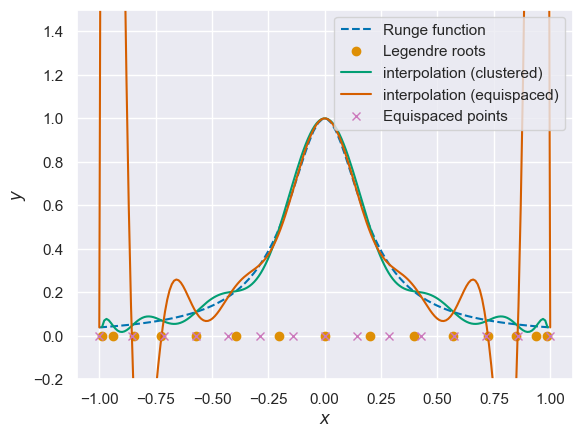

In [13]:
@interact(N=(0, 30))
def plot(N):
    # Get the roots of the Legendre polynomials 
    x_p = np.linspace(-1, 1, N) 
    x_p = np.polynomial.legendre.leggauss(N)[0]
    print(f"Number of interpolation points: {len(x_p)} ")

    # Evaluate the Runge function
    y_p = runge(x_p)

    # Use NumPy function to compute the polynomial
    from numpy.polynomial import Legendre as P
    p = P.fit(x_p, y_p, N);


    x_e = np.linspace(-1, 1, N)

    # Evaluate the Runge function
    y_e = runge(x_e)

    # Use NumPy function to compute the polynomial
    from numpy.polynomial import Legendre as P
    p_e = P.fit(x_e, y_e, N);

    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot(np.linspace(-1, 1, 100), runge( np.linspace(-1, 1, 100)),'--', label='Runge function');
    plt.plot(x_p, np.zeros(len(x_p)),'o', label="Legendre roots");
    plt.plot(*p.linspace(200), '-', label='interpolation (clustered)');
    plt.plot(*p_e.linspace(200), '-', label='interpolation (equispaced)');
    plt.plot(x_e, np.zeros(len(x_e)),'x', label="Equispaced points");

    plt.ylim(-0.2, 1.5)
    plt.legend();

The polynomial that interpolates at points that are clustered near the ends of the interval exhibits very limited oscillation, whereas the oscillations for the equispaced case are very large.

## Interpolating the sine graph

We consider now interpolating points takes from the sine graph. 

/Users/garth/code/fenics/venv/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


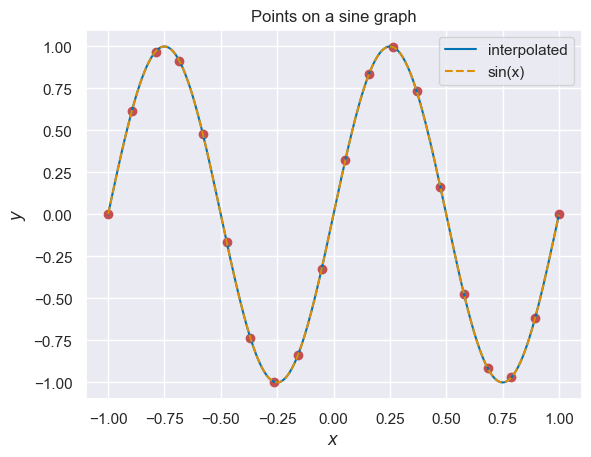

In [14]:
N = 20
def sine(x):
    return np.sin(2 * np.pi * x)

x_p = np.linspace(-1, 1, N)
y_p = sine(x_p)

from numpy.polynomial import Polynomial as P
y_fit = P.fit(x_p, sine(x_p), N);

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Points on a sine graph')
plt.plot(x_p, y_p,'ro');
plt.plot(*y_fit.linspace(200),'-',  label='interpolated');

x = np.linspace(-1, 1, 200)
plt.plot(x, sine(x),'--', label='sin(x)');
plt.legend();

We can see from the graph that the polynomial closely ressambles the sine function in this case, despite the high degree of the polynomial.

However, the picture changes if we introduce a very small amount of noise to the sine graph:

/Users/garth/code/fenics/venv/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


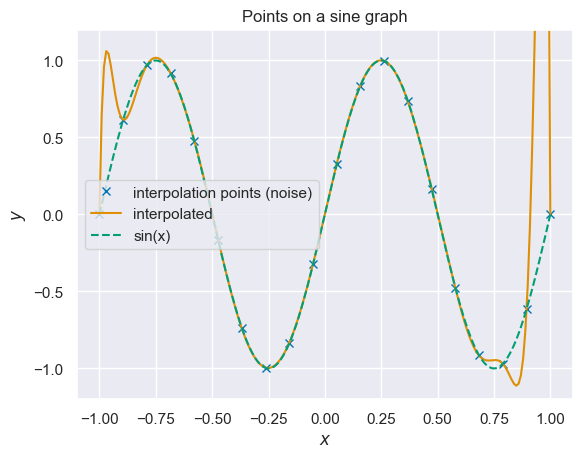

In [15]:
N = 20

def noisy_sine(x, noise):
    return np.sin(2 * np.pi * x) + np.random.uniform(-noise/2.0, noise/2.0, len(x))

x_p = np.linspace(-1, 1, N)
y_p = sine(x_p)


from numpy.polynomial import Polynomial as P
y_fit = P.fit(x_p, noisy_sine(x_p, 0.01), N);


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Points on a sine graph')
plt.plot(x_p, y_p,'x',label='interpolation points (noise)');
plt.plot(*y_fit.linspace(200),'-',  label='interpolated');

x = np.linspace(-1, 1, 200)
plt.plot(x, sine(x),'--', label='sin(x)');
plt.ylim(-1.2, 1.2)
plt.legend();

We see the Runge effect again, with large oscillations towards the ends of the domain.

## Least-squares fitting

We will now looking at fitting a polynomial of degree $k < n + 1$ to points on the sine graph. The degree of the polynomial is not high enough to interpolate all points, so we will compute a best-fit in the least-squares sense.

We have seen in lectures that solving the least squares solution involves solving 

$$
\boldsymbol{A}^{T}\boldsymbol{A} \boldsymbol{c} = \boldsymbol{A}^{T} \boldsymbol{y}
$$

If we want ot fit a $5$th-order polynomial to 20 data points, $\boldsymbol{A}$ is the $20 \times 6$ matrix:

$$ 
\boldsymbol{A} = \begin{bmatrix}
     x_{1}^{5} & x_{1}^{4} & \ldots & x_{1}^{2}  & x_{1} & 1  
    \\
     x_{2}^{5} & x_{2}^{4} & \ldots & x_{2}^{2}  & x_{2} & 1  
    \\
    \vdots  & \vdots & \vdots    & \ldots & \vdots   
    \\
    \vdots  & \vdots & \vdots    & \ldots & \vdots   
    \\
     x_{20}^{5} & x_{20}^{4} & \ldots & x_{20}^{2}  & x_{20} & 1  
\end{bmatrix}
$$

and $\boldsymbol{c}$ contains the $6$ polynomial coefficients 

$$ 
\boldsymbol{c} 
    = \begin{bmatrix}
     c_{0} & c_{1} & c_{2} & c_{3} & c_{4}
    \end{bmatrix}
$$

and $\boldsymbol{y}$ contains the 20 points we want to fit.

### Fitting points on the Runge function

Let's try fitting a lower-order polynomial to the 20 data points without noise. We start with a polynomial of degree 6. We first create the Vandermonde matrix:

In [16]:
N = 20
x_p = np.linspace(-1, 1, N)
A = np.vander(x_p, 6)

and then solve $$\boldsymbol{A}^{T}\boldsymbol{A} \boldsymbol{c} = \boldsymbol{A}^{T} \boldsymbol{y}$$ and create a NumPy polynomial from the coefficients:

In [17]:
ATA = (A.T).dot(A)

y_p = runge(x_p)
c_ls = np.linalg.solve(ATA, (A.T).dot(y_p))
p_ls = np.poly1d(c_ls)
print(p_ls)

            5         4             3        2
-9.478e-15 x + 1.581 x + 1.234e-14 x - 2.11 x - 3.337e-15 x + 0.6552


Plotting the polynomial:

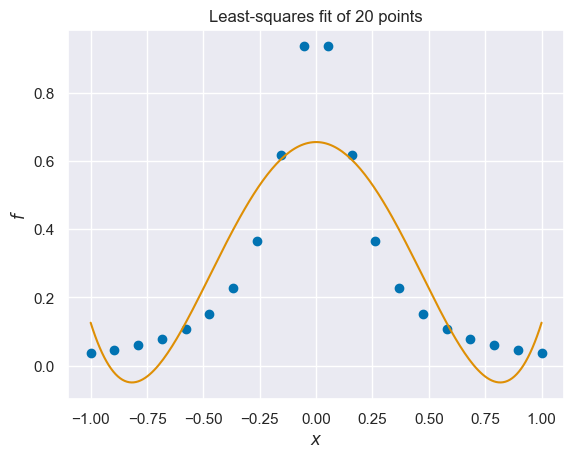

In [18]:
# Evaluate polynomial at some points
y_ls = p_ls(x_fit)

# Plot
plt.xlabel('$x$')
plt.ylabel('$f$')
# plt.ylim(-1.1, 1.1)
plt.title('Least-squares fit of 20 points')
plt.plot(x_p, y_p, 'o', x_fit, y_ls,'-');

To explore polynomial orders, we will create an interactive plot with a slider for the polynomial degree.

interactive(children=(IntSlider(value=9, description='order', max=19), Output()), _dom_classes=('widget-intera…

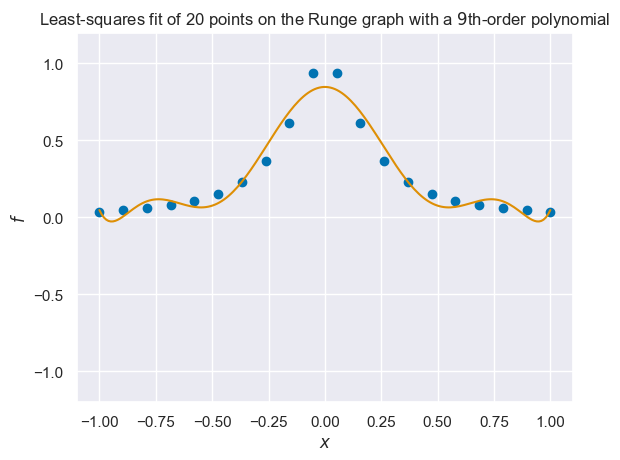

In [19]:
@interact(order=(0, 19))
def plot(order):

    # Create Vandermonde matrix    
    A = np.vander(x_p, order + 1)
    
    ATA = (A.T).dot(A)
    c_ls = np.linalg.solve(ATA, (A.T).dot(y_p))
    p_ls = np.poly1d(c_ls)
    
    # Evaluate polynomial at some points
    y_ls = p_ls(x_fit)

    # Plot
    plt.xlabel('$x$')
    plt.ylabel('$f$')
    plt.ylim(-1.2, 1.2)
    plt.title('Least-squares fit of 20 points on the Runge graph with a ${}$th-order polynomial'.format(order))
    plt.plot(x_p, y_p, 'o', x_fit, y_ls,'-')

The fit appears to be reasonable for modest degree polynomials. 